## Exploratory Data Analysis – Mini Project:

- A new football club named ‘Brussels United FC’ has just been inaugurated. This club does not have a team yet. The team is looking to hire players for their roster. Management wants to make such decisions using data based approach. During a recent hiring drive, you were selected for the Data Science team as a Junior data scientist. Your team has been tasked with creating a report which recommends players for the main team. To start with, a total 15 players are required. Player data for all teams has been acquired from FIFA. This data contains information about the palyers, the clubs they are currently playing for and various performance measures. There is a limited budget for hiring players. The team needs 20 possible players to choose from. You have been requested to formulate a report in order to help the management make a decision regarding potential players.

### Data:

- The data contains details for over 18,000 players playing in various football clubs in Europe. It contains information on age, skill rating, wages and player value, etc. The files provided are as folows: 

    - fifa.csv – data file.
    - fifa_ variable_information.csv - information on individual variables.

### Data Preprocessing:

1.	Import the necessary libraries and read the data.
2.	Drop any columns that you deem unecessary for analysis.
3.	The following columns need to be converted for further analysis:

####  Column      -->      Details    -->      Required output


    1. 'Value'	-- > Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.	-- > Convert to Float after getting rid of currency symbol and suffix.


    2. 'Wage' -->	 Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively. -->	Convert to Float after getting rid of currency symbol and suffix.

    3. 'Joined'	--> Year as a string, in some cases complete date as string	-- >Convert to int with only year

    4. 'Contract Valid Until' -->	Date as a string 	--> Convert to datetime type

    5. 'Height'	 --> In inches with a quotation mark 	--> Convert to Float with decimal points

    6. 'Weight'	--> Contains the suffix lbs 	--> Remove the suffix and convert to float

    7. 'Release Clause'	-->  Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.	--- > Convert to Float after getting rid of currency symbol and suffix.


    - (You might encounter Nan values in the above columns. Pandas treats Nan values as float. Please keep that in mind when making the conversions.)

4.	Check for missing values and do a mean imputation where necessary.


## Exploratory Analysis:

1.	Plot the distribution of Overall rating for all players. 

2.	Generate pair plots for the following variables: Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.
    a)	What would the average wage for this set of players be?
    b)	What is the average age?
    c)	Is there a correlation between the Overall rating and Value for these players?

4.	Generate tables containing the top 5 players by Overall rating for each unique position.
    a)	Are there any players appearing in more than one Table. Please point out such players.
    b)	What is the average wage one can expect to pay for the top 5 in every position?

## Final Report:

- Put all highlights from the information obtained above in a power point presentation containing a maximum of 5 slides. No title slide required.


## Data Preprocessing 

### Step 1: Import the necessary libraries and read the data.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('fifa.csv')

In [3]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
df1 = pd.read_csv('fifa_ variable_information.csv')

In [5]:
df1.head()

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag


In [6]:
df.shape

(18207, 60)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

### Step 2: Drop any columns that you deem unecessary for analysis.

- On analysing the given dataset, it can be observed that the following columns are unnecessary for analysis. Therefore, can be dropped.
    1. Photo 
    2. Flag 
    3. Club 
    4. Club Logo
    5. Jersey Number

In [8]:
df_dropped = df.drop(columns=['Photo','Flag','Club Logo','Jersey Number'])

In [9]:
df_dropped.shape # 5 columns are dropped

(18207, 56)

### Cleaning the data:

- Three approaches are:
    
    1. Null check/Invalid data: Handling missing or inappropriate data.
    2. Format issue: Checking if the values are in appropriate format.
    3. Type check: Column should have the expected datatype.

### Step 3: Check for missing values and do a mean imputation where necessary.

In [12]:
# Columns with Null / Missing values

df_na = (df_dropped.isnull().sum() / len(df_dropped)) * 100
missing_data = pd.DataFrame({'Count of Missing values': df_dropped.isnull().sum(),'% of Missing values' :df_na})
missing_data = missing_data.sort_values(by='Count of Missing values', ascending=False)
missing_data

,Count of Missing values,% of Missing values
Loaned From,16943,93.057615
Release Clause,1564,8.590103
Joined,1553,8.529686
Contract Valid Until,289,1.587302
Club,241,1.323667
Position,60,0.329544
GKHandling,48,0.263635
GKDiving,48,0.263635
Agility,48,0.263635
Reactions,48,0.263635


#### Loaned From: 

- Almost 93.05% of data are missing
- Therefore, replacing the missing values with mean/median will not be a right approach
- Hence, it is appropriate to drop the column from the dataset

In [13]:
df_drop1 = df_dropped.drop(columns='Loaned From')
print(df_drop1.shape)

(18207, 55)


#### Release Clause:

- Only 8.59% of the data are missing in this column
- Therefore, we can replace the missing values with mean/median
- 'Release Clause' -->  Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.    --- > Convert to Float after getting rid of currency symbol and suffix.
- Check if all the columns are having € and get rid of it.
- Replace each 'K' or 'M' with respective 1000 or 1000000 values.

In [17]:
def clean_release_clause(x):
    x = str(x)
    if '€' in x:
        x = x.replace('€','')
    if "M" in x:
        m = 10 ** 6
        x = x.replace('M','')
        x = str(float(x) * m)
    if "K" in x:
        k = 10 ** 3
        x = x.replace('K','')
        x = str(float(x)*k)
    return float(x)
    
df_drop1['Release Clause'] = df_drop1['Release Clause'].apply(clean_release_clause)
df_drop1['Release Clause'].head()

0    226500000.0
1    127100000.0
2    228100000.0
3    138600000.0
4    196400000.0
Name: Release Clause, dtype: float64

In [18]:
df_drop1['Release Clause'].isnull().sum()

1564

In [19]:
df_drop1['Release Clause'] = df_drop1['Release Clause'].fillna(df_drop1['Release Clause'].mean())

In [20]:
df_drop1['Release Clause'].isnull().sum() ## NULL values are replaced with mean value

0

#### Joined

- 8.53% of data are missing in this column
- 'Joined'  --> Year as a string, in some cases complete date as string -- > Convert to int with only year
- There are a few NaN values, removing those rows from the data.
- Since we dont require the exact date in this scenario, changing the formatting of the Date to year only format.

In [23]:
df_drop1.dropna(subset=['Joined'],inplace=True) ## Dropping rows with missing values

df_drop1['Joined'] = df_drop1['Joined'].apply(lambda x: str(x)[-4:]) # extracting only year from the date

df_drop1['Joined'] = df_drop1['Joined'].apply(int)  # converting datatype to int
df_drop1['Joined']

0        2004
1        2018
2        2017
3        2011
4        2015
         ... 
18202    2017
18203    2018
18204    2017
18205    2018
18206    2018
Name: Joined, Length: 16654, dtype: int64

#### Contract Valid Until:

- No nulls in the columns, leaving it as it is.
- Converting type of column to date time.
- 'Contract Valid Until' -->    Date as a string     --> Convert to datetime type

In [24]:
df_drop1['Contract Valid Until'].isnull().sum()

0

In [25]:
import datetime as dt

df_drop1['Contract Valid Until'] = df_drop1['Contract Valid Until'].apply(
    lambda x: dt.datetime.strptime(x,'%Y')).dt.year

In [26]:
df_drop1['Contract Valid Until']

0        2021
1        2022
2        2022
3        2020
4        2023
         ... 
18202    2019
18203    2020
18204    2021
18205    2019
18206    2019
Name: Contract Valid Until, Length: 16654, dtype: int64

#### Checking again for NULL values

In [27]:
df_drop1.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions 

### The data is cleaned without any NULL values

#### Value and Wage :

- 'Value'    -- > Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.    -- > Convert to Float after getting rid of currency symbol and suffix.

- 'Wage' -->     Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively. -->    Convert to Float after getting rid of currency symbol and suffix.

- These two columns can be cleaned similar to 'Release Clause' column, so we can reuse the clean_release_clause function 

In [28]:
df_drop1[['Value','Wage']] = df_drop1[['Value','Wage']].apply(lambda x : [clean_release_clause(i) for i in x])

In [29]:
df_drop1['Value']

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
            ...     
18202        60000.0
18203        60000.0
18204        60000.0
18205        60000.0
18206        60000.0
Name: Value, Length: 16654, dtype: float64

In [30]:
df_drop1['Wage']

0        565000.0
1        405000.0
2        290000.0
3        260000.0
4        355000.0
           ...   
18202      1000.0
18203      1000.0
18204      1000.0
18205      1000.0
18206      1000.0
Name: Wage, Length: 16654, dtype: float64

#### Height:

- 'Height' --> In inches with a quotation mark     --> Convert to Float with decimal points
- we do not have any null values in this column
- Formatting: The data can be formatted from 'inch to ft
- 1 ft = 12.0 inches


In [33]:
from functools import reduce
from operator import add

def inch_to_ft(x):
    ft = list(map(int,x.split("'")))
    ft[1] = ft[1] / 12
    
    return reduce(add,ft)

In [37]:
# df_drop1['Height'] = df_drop1['Height'].map(lambda x : inch_to_ft(x))

In [40]:
df_drop1['Height'] = df_drop1['Height'].apply(lambda x: round(x,2)) 

In [41]:
df_drop1['Height']

0        5.58
1        6.17
2        5.75
3        6.33
4        5.92
         ... 
18202    5.75
18203    6.25
18204    5.67
18205    5.83
18206    5.83
Name: Height, Length: 16654, dtype: float64

#### Weight

- 'Weight'    --> Contains the suffix lbs     --> Remove the suffix and convert to float

In [42]:
pd.unique(df_drop1['Weight'].map(lambda x: x[-3:])) ## All the values have last three characters as 'lbs'

array(['lbs'], dtype=object)

In [49]:
def clean_weight(x):
    x = str(x)
    x= x[:-3]
    
    return float(x)

In [50]:
df_drop1['Weight'] = df_drop1['Weight'].apply(clean_weight)
df_drop1['Weight']

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 16654, dtype: float64

In [51]:
### Saving the cleaned data to a new variable

cleaned_data = df_drop1
cleaned_data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [52]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16654 entries, 0 to 18206
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16654 non-null  int64  
 1   Name                      16654 non-null  object 
 2   Age                       16654 non-null  int64  
 3   Nationality               16654 non-null  object 
 4   Overall                   16654 non-null  int64  
 5   Potential                 16654 non-null  int64  
 6   Club                      16654 non-null  object 
 7   Value                     16654 non-null  float64
 8   Wage                      16654 non-null  float64
 9   Preferred Foot            16654 non-null  object 
 10  International Reputation  16654 non-null  float64
 11  Weak Foot                 16654 non-null  float64
 12  Skill Moves               16654 non-null  float64
 13  Work Rate                 16654 non-null  object 
 14  Body T

## Exploratory Analysis:

### 1. Plot the distribution of Overall rating for all players. 

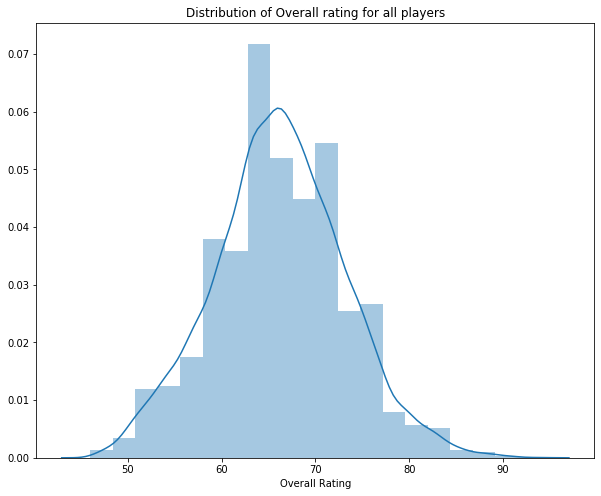

In [63]:
plt.figure(figsize = (10,8))
sns.distplot(cleaned_data['Overall'],bins=20)
plt.title('Distribution of Overall rating for all players')
plt.xlabel('Overall Rating')
plt.show()

### 2. Generate pair plots for the following variables: 
- Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

In [64]:
cols = ["Overall", "Height", "Weight", "Release Clause"]
cleaned_data.loc[:,cols].dtypes

Overall             int64
Height            float64
Weight            float64
Release Clause    float64
dtype: object

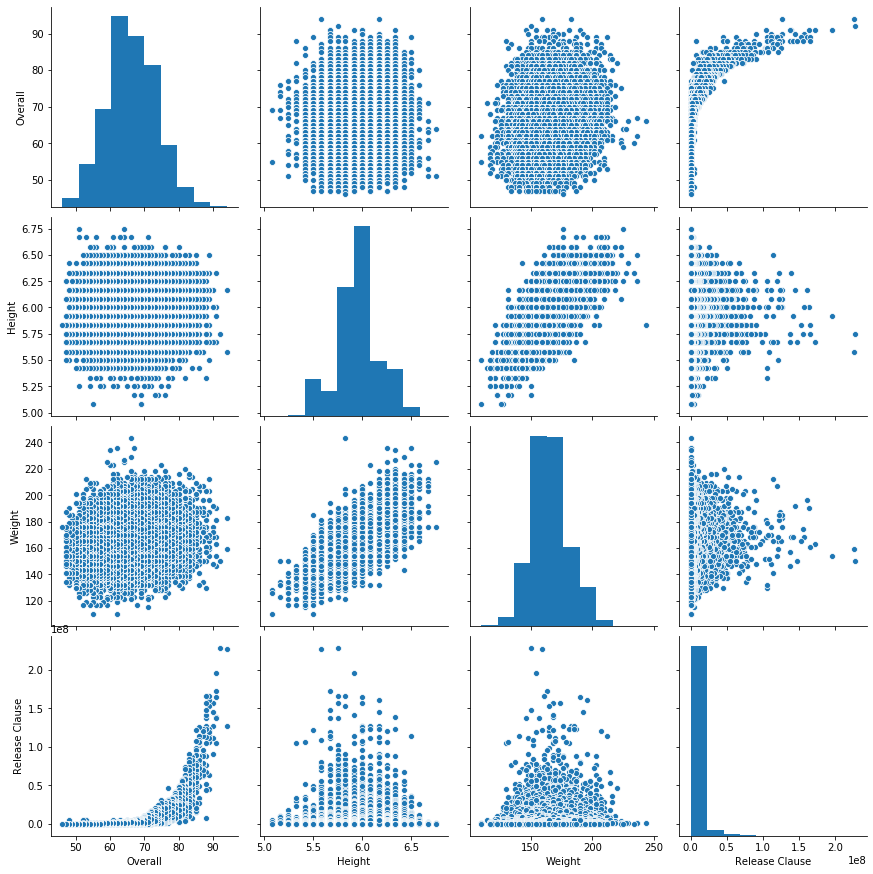

In [66]:
sns.pairplot(data=cleaned_data.loc[:,cols],height=3)

plt.show()


### 3. Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [69]:
top_20 = cleaned_data[cleaned_data['Contract Valid Until'] == 2020].sort_values
(by='Overall',ascending=False).head(20)

In [70]:
top_20

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
13,168542,David Silva,32,Spain,90,90,Manchester City,60000000.0,285000.0,Left,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0
21,179813,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,60000000.0,200000.0,Right,...,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0
31,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0
39,164240,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,24000000.0,165000.0,Right,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44400000.0
50,175943,D. Mertens,31,Belgium,87,87,Napoli,45000000.0,135000.0,Right,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76500000.0


### 3.a)	What would the average wage for this set of players be?

In [73]:
top_20['Wage'].mean()

205450.0

### 3.b) What is the average age?

In [74]:
top_20['Age'].mean()

30.65

In [75]:
cleaned_data['Age'].mean()

25.23651975501381

### 3.c) Is there a correlation between the Overall rating and Value for these players?

In [78]:
top_20[['Overall','Value']].corr()

,Overall,Value
Overall,1.000000,0.786717
Value,0.786717,1.000000


- There is a high correlation between the Overall rating and Value. (correlation factor = 0.78)
- This means that Overall rating and Value are strongly related to one another

### 4.	Generate tables containing the top 5 players by Overall rating for each unique position.
    

In [85]:
top_5 = cleaned_data.groupby(by='Position')['Position','Overall'].head(5).sort_values(['Position','Overall'],ascending=[True,False])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [86]:
top_5

,Position,Overall
17,CAM,89
31,CAM,88
61,CAM,86
66,CAM,86
74,CAM,86
...,...,...
1,ST,94
10,ST,90
16,ST,89
23,ST,89


### 4.a)	Are there any players appearing in more than one Table. Please point out such players.

In [87]:
players = cleaned_data['Name'].value_counts()
players[players > 1]

J. Rodríguez     9
Paulinho         7
J. Valencia      6
J. Williams      6
J. Gómez         6
                ..
Manu García      2
J. Andersson     2
J. Meneses       2
A. Donnarumma    2
G. Pezzella      2
Name: Name, Length: 670, dtype: int64

### 4.b)	What is the average wage one can expect to pay for the top 5 in every position?

In [88]:
cleaned_data = cleaned_data.sort_values(by='Overall')
top_5 = cleaned_data.groupby('Position')
top_5['Wage'].mean()

Position
CAM    10158.134243
CB      7671.922377
CDM     9412.371134
CF     10060.606061
CM      8143.416928
GK      6717.813978
LAM    11700.000000
LB      8794.117647
LCB    11768.844221
LCM    13716.713881
LDM    10660.714286
LF     44666.666667
LM      9516.798419
LS     14108.695652
LW     12997.041420
LWB     8631.578947
RAM    19095.238095
RB      8594.662219
RCB    12868.292683
RCM    14397.183099
RDM    12109.649123
RF     60923.076923
RM      9345.401174
RS     13664.804469
RW     14375.384615
RWB     8404.761905
ST      9675.155925
Name: Wage, dtype: float64